In [8]:
# %load process_data.py
# this is process_data function.
# need to feed flag :'training','test','validation' as string
#return data dictionary 
#example:Data=process_data('training') ,then Red_input=Data['Red'] as a [batch_size,1080] array
# data in the directory '../MAE_KITTI/data_18x60/'
def process_data(flag):
    
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import scipy.io
    
    data_index=pd.read_csv('../MAE_KITTI/kitti_split.txt',header=None)
    
    if flag=='validation':
        input_index=data_index[59:61]
    elif flag=='training':
        input_index=data_index[1:29]
    elif flag=='test':
        input_index=data_index[31:58]
    else:
        print('error')
        
    foldernamme='../MAE_KITTI/data_18x60/'
    input_index=input_index.values
    xcr1=np.empty((1080,0))
    xcg1=np.empty((1080,0))
    xcb1=np.empty((1080,0))
    xid1=np.empty((1080,0))
    dmask1=np.empty((1080,0))
    Ground1=np.empty((1080,0))
    Objects1=np.empty((1080,0))
    Building1=np.empty((1080,0))
    Vegetation1=np.empty((1080,0))
    Sky1=np.empty((1080,0))
    xcr2=np.empty((1080,0))
    xcg2=np.empty((1080,0))
    xcb2=np.empty((1080,0))
    xid2=np.empty((1080,0))
    dmask2=np.empty((1080,0))
    Ground2=np.empty((1080,0))
    Objects2=np.empty((1080,0))
    Building2=np.empty((1080,0))
    Vegetation2=np.empty((1080,0))
    Sky2=np.empty((1080,0))
    
    for i in range(len(input_index)):
        name=input_index[i][0]
        RGB1name=foldernamme+'data_kitti_im02_'+name+'_18x60.mat'
        RGB2name=foldernamme+'data_kitti_im03_'+name+'_18x60.mat'
    
        Depth1name=foldernamme+'data_kitti_InvDepth02_'+name+'_18x60'
        Depth2name=foldernamme+'data_kitti_InvDepth03_'+name+'_18x60'
    
        Sem1name=foldernamme+'data_kitti_seg02_'+name+'_18x60'
        Sem2name=foldernamme+'data_kitti_seg03_'+name+'_18x60'

        mat1=scipy.io.loadmat(RGB1name)
        xcr1=np.append(xcr1,mat1['xcr'],axis=1)
        xcg1=np.append(xcg1,mat1['xcg'],axis=1)
        xcb1=np.append(xcb1,mat1['xcb'],axis=1)
        mat2=scipy.io.loadmat(RGB2name)
        xcr2=np.append(xcr2,mat2['xcr'],axis=1)
        xcg2=np.append(xcg2,mat2['xcg'],axis=1)
        xcb2=np.append(xcb2,mat2['xcb'],axis=1)
    
    
        matd1=scipy.io.loadmat(Depth1name)
        xid1=np.append(xid1,matd1['xid'],axis=1)
        dmask1=np.append(dmask1,matd1['xmask'],axis=1)
        matd2=scipy.io.loadmat(Depth2name)
        xid2=np.append(xid2,matd2['xid'],axis=1)
        dmask2=np.append(dmask2,matd1['xmask'],axis=1)
    
    
        mats1=scipy.io.loadmat(Sem1name)
        Ground1=np.append(Ground1,(mats1['xss']==1).astype(int),axis=1)
        Objects1=np.append(Objects1,(mats1['xss']==2).astype(int),axis=1)
        Building1=np.append(Building1,(mats1['xss']==3).astype(int),axis=1)
        Vegetation1=np.append(Vegetation1,(mats1['xss']==4).astype(int),axis=1)
        Sky1=np.append(Sky1,(mats1['xss']==5).astype(int),axis=1)
    
        mats2=scipy.io.loadmat(Sem2name)
        Ground2=np.append(Ground2,(mats2['xss']==1).astype(int),axis=1)
        Objects2=np.append(Objects2,(mats2['xss']==2).astype(int),axis=1)
        Building2=np.append(Building2,(mats2['xss']==3).astype(int),axis=1)
        Vegetation2=np.append(Vegetation2,(mats2['xss']==4).astype(int),axis=1)
        Sky2=np.append(Sky2,(mats2['xss']==5).astype(int),axis=1)
        
        
    xcr1=np.transpose(xcr1)
    xcg1=np.transpose(xcg1)
    xcb1=np.transpose(xcb1)
    xid1=np.transpose(xid1)
    dmask1=np.transpose(dmask1)
    Ground1=np.transpose(Ground1)
    Objects1=np.transpose(Objects1)
    Building1=np.transpose(Building1)
    Vegetation1=np.transpose(Vegetation1)
    Sky1=np.transpose(Sky1)

    xcr2=np.transpose(xcr2)
    xcg2=np.transpose(xcg2)
    xcb2=np.transpose(xcb2)
    xid2=np.transpose(xid2)
    dmask2=np.transpose(dmask2)
    Ground2=np.transpose(Ground2)
    Objects2=np.transpose(Objects2)
    Building2=np.transpose(Building2)
    Vegetation2=np.transpose(Vegetation2)
    Sky2=np.transpose(Sky2)
    

    Depth_data=np.concatenate((xid1,xid2),axis=0)
    Depthmask_data=np.concatenate((dmask1,dmask2),axis=0)
    Red_data=np.concatenate((xcr1,xcr2),axis=0)/255.0
    Green_data=np.concatenate((xcg1,xcg2),axis=0)/255.0
    Blue_data=np.concatenate((xcb1,xcb2),axis=0)/255.0
    Ground_data=np.concatenate((Ground1,Ground2),axis=0)
    Objects_data=np.concatenate((Objects1,Objects2),axis=0)
    Building_data=np.concatenate((Building1,Building2),axis=0)
    Vegetation_data=np.concatenate((Vegetation1,Vegetation2),axis=0)
    Sky_data=np.concatenate((Sky1,Sky2),axis=0)   
    
    return {'Red':Red_data,
            'Green':Green_data,
            'Blue':Blue_data,
            'Depth':Depth_data,
            'Depthmask':Depthmask_data,
            'Ground':Ground_data,
            'Objects':Objects_data,
            'Building':Building_data,
            'Vegetation':Vegetation_data,
            'Sky':Sky_data}

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy.io

In [10]:
pwd

'/Users/yi/Desktop/yi/project/bitbucket/mae_tensorflow'

In [11]:
dict_test=process_data('test')

# RGB

In [39]:
dict_train['Red'].shape

(37634, 1080)

In [40]:
Red=dict_train['Red']
Green=dict_train['Green']
Blue=dict_train['Blue']

In [44]:
RGB=np.dstack((Red,Green,Blue))

In [45]:
RGB.shape

(37634, 1080, 3)

In [46]:
RGB=np.reshape(RGB,(-1,60,18,3))

In [49]:
RGB=np.transpose(RGB,(0,2,1,3))

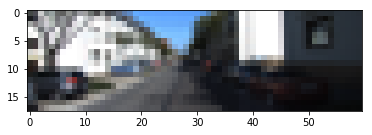

In [55]:
plt.imshow(RGB[17000])

In [56]:
np.save("../Data_test/rgb_data.npy",RGB)

# Depth

In [15]:
dict_test['Depth'].shape

(37626, 1080)

In [62]:
Depth=dict_train['Depth']
Mask=dict_train['Depthmask']

In [63]:
Depth.shape

(37626, 1080)

In [64]:
Depth=np.reshape(Depth,(-1,60,18,1))

In [65]:
Mask=np.reshape(Mask,(-1,60,18,1))

In [68]:
Depth=Depth*Mask

In [69]:
Depth=np.transpose(Depth,(0,2,1,3))
Mask=np.transpose(Mask,(0,2,1,3))

In [77]:
Depth.shape

(37626, 18, 60, 1)

In [75]:
np.save("../Data_test/depth_data.npy",Depth)
np.save("../Data_test/depthmask_data.npy",Mask)

# Semantic 

In [95]:
Ground=dict_train['Ground']
Objects=dict_train['Objects']
Building=dict_train['Building']
Vegetation=dict_train['Vegetation']
Sky=dict_train['Sky']

In [96]:
Ground=np.reshape(Ground,(-1,60,18,1))
Ground=np.transpose(Ground,(0,2,1,3))
Objects=np.reshape(Objects,(-1,60,18,1))
Objects=np.transpose(Objects,(0,2,1,3))
Building=np.reshape(Building,(-1,60,18,1))
Building=np.transpose(Building,(0,2,1,3))
Vegetation=np.reshape(Vegetation,(-1,60,18,1))
Vegetation=np.transpose(Vegetation,(0,2,1,3))
Sky=np.reshape(Sky,(-1,60,18,1))
Sky=np.transpose(Sky,(0,2,1,3))

In [97]:
Sem=np.concatenate( (Ground,Objects,Building,Vegetation,Sky),axis=3 )

In [98]:
Sem.shape

(37634, 18, 60, 5)

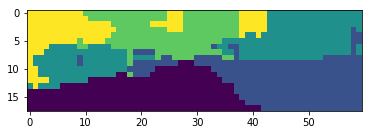

In [99]:
plt.imshow(np.argmax(Sem[0],axis=2))

In [100]:
np.save("../Data_test/sem_data.npy",Sem)

#  Finish implementing 

# testing 

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline 

/Users/yi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Depth

In [4]:
x=np.load("../Data_test/depth_data.npy")

In [5]:
x.shape

(37626, 18, 60, 1)

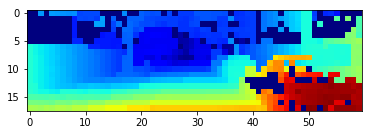

In [6]:
plt.imshow(x[0,:,:,0],cmap='jet')

In [7]:
x1=np.load("../Data_test/depthmask_data.npy")

In [8]:
x1.shape

(37626, 18, 60, 1)

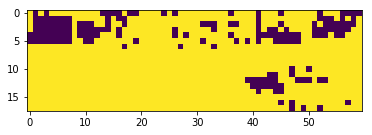

In [9]:
plt.imshow(x1[0,:,:,0])

# Semantic labels

In [10]:
x2=np.load("../Data_test/sem_data.npy")

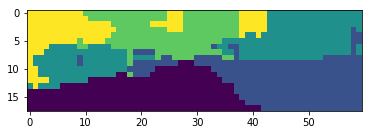

In [11]:
plt.imshow(np.argmax(x2[0],axis=2))

# RGB

In [12]:
x3=np.load("../Data_test/rgb_data.npy")

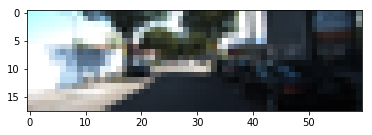

In [13]:
plt.imshow(x3[0])

# random test 

In [17]:
matrix=np.random.rand(3,3,3)

In [18]:
matrix

array([[[0.65787194, 0.09448188, 0.24409059],
        [0.31906101, 0.60425121, 0.8158153 ],
        [0.38732447, 0.42145297, 0.02271363]],

       [[0.80511303, 0.01854845, 0.521351  ],
        [0.33355116, 0.84655273, 0.13262765],
        [0.06743106, 0.7446872 , 0.30396007]],

       [[0.31883744, 0.50939811, 0.39351072],
        [0.82794174, 0.17173298, 0.7896305 ],
        [0.19046202, 0.07473024, 0.40314463]]])

In [19]:
index=matrix>0.2

In [21]:
matrix_2=matrix[index]